In [1]:
import numpy as np
import pandas as pd
import sklearn.linear_model as sklearn_lm
import matplotlib.pyplot as mp_plt
import seaborn as sns
import sklearn.decomposition as sklearn_dcmp
import sklearn.preprocessing as sklearn_pproc
import pdb

%matplotlib inline

### Load Data

In [2]:
# generate training and test set
def split_train_test(data, NUM_SAMPLES, dr=0.8):
  NUM_TRAIN = int(NUM_SAMPLES * dr) # dr = data ratio
  NUM_TEST = NUM_SAMPLES - NUM_TRAIN
#   pdb.set_trace()
  train_indexes = np.random.choice(NUM_SAMPLES, NUM_TRAIN, replace=False)
  test_indexes = np.setdiff1d(np.arange(0,NUM_SAMPLES), train_indexes, assume_unique=True)
  train_data = data[train_indexes]
  test_data = data[test_indexes]
  
  X_train = train_data[:,:-1]
  y_train = train_data[:,-1]
  X_test = test_data[:,:-1]
  y_test = test_data[:,-1]
  
  return {'train':[NUM_TRAIN, X_train, y_train], 'test':[NUM_TEST, X_test, y_test]}

# load data
data = pd.read_csv('german.txt', delimiter=',', header=None)
data = data.values
NUM_SAMPLES = data.shape[0]

# define constants
NUM_CLASSES = 2
NUM_ITER = 50


In [3]:
# normalise input
def get_normalised(X, param=None):
  if(param):
    X_mu = param[0]
    X_var = param[1]
  else:
    X_mu = np.mean(X, axis=0)
    X_var = np.var(X, axis=0)

  X_norm = (X - X_mu) / np.sqrt(X_var)
  
  if(not param):
    return [X_norm, [X_mu, X_var]]
  else:
    return [X_norm, None]


### Feature Correlation

In [4]:
def get_corr(X):
  # normalise and compute covariance matrix
  X_t, _ = get_normalised(X)
  X_cov = np.dot(X_t.T, X_t) / X.shape[0]
  
  mp_plt.figure(figsize=(8,6))
  ax = mp_plt.gca()
  sns.heatmap(X_cov, xticklabels=np.arange(1,25), yticklabels=np.arange(1,25))
  ax.set_title('Feature Correlation')
  

### Logistic Regression Classifier

In [5]:
def get_accuracy(y_test, y_pred):
  return np.float64(sum(y_test == y_pred)) / np.float64(y_test.size)

def linear_classifier(data, NUM_SAMPLES, NUM_ITER):
  # initialise
  acc = np.empty((NUM_ITER, 1))
  
  for i in range(NUM_ITER):
    # generate training and test data
    data_dict = split_train_test(data, NUM_SAMPLES)
    NUM_TRAIN, NUM_TEST = data_dict['train'][0], data_dict['test'][0]
    X_train, X_test = data_dict['train'][1], data_dict['test'][1]
    y_train, y_test = data_dict['train'][2], data_dict['test'][2]

    # training class labels
    l1_idx = np.asarray([i for i in range(NUM_TRAIN) if y_train[i] == 1])
    l2_idx = np.asarray([i for i in range(NUM_TRAIN) if y_train[i] == 2])
    label_idx = [l1_idx, l2_idx]  

    # random subsampling
    if(l2_idx.size < l1_idx.size):
#       pdb.set_trace()
      l1_idx = np.random.choice(l1_idx, l2_idx.size, replace=False)
      X_train = np.concatenate((X_train[l1_idx], X_train[l2_idx]), axis=0)
      y_train = np.concatenate((y_train[l1_idx], y_train[l2_idx]), axis=0)
    elif(l1_idx.size < l2_idx.size):
      l2_idx = np.random.choice(NUM_TRAIN, l1_idx.size, replace=False)
      X_train = np.concatenate((X_train[l1_idx], X_train[l2_idx]), axis=0)
      y_train = np.concatenate((y_train[l1_idx], y_train[l2_idx]), axis=0)
    
    # shuffle training data
    data_train = np.concatenate((X_train, np.expand_dims(y_train, axis=-1)), axis=-1)
    np.random.shuffle(data_train)
    X_train = data_train[:,:-1]
    y_train = data_train[:,-1]
  
#     get_corr(X_train)

    # normalise data
    standardscaler = sklearn_pproc.StandardScaler()
    X_train = standardscaler.fit_transform(X_train)
    X_test = standardscaler.transform(X_test)
#     X_train, datadensity_param = get_normalised(X_train)
#     X_test,_ = get_normalised(X_test, datadensity_param)  
    
#     pca = sklearn_dcmp.PCA(n_components=18)
#     X_train = pca.fit_transform(X_train)
#     X_test = pca.transform(X_test)
    
    # randomly sample data from both classes
#     clf = sklearn_lm.SGDClassifier(loss='log', penalty='none')
    clf = sklearn_lm.LogisticRegression(penalty='l2')
    clf.fit(X_train, y_train)

    y_pred = clf.predict(X_test)
    acc[i] = get_accuracy(y_test, y_pred)

  return acc

acc = linear_classifier(data, NUM_SAMPLES, 50)
print(np.mean(acc), np.var(acc))

F:\Programming Tools\Anaconda 2\envs\python36\lib\site-packages\sklearn\utils\validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)


0.7209 0.00100669


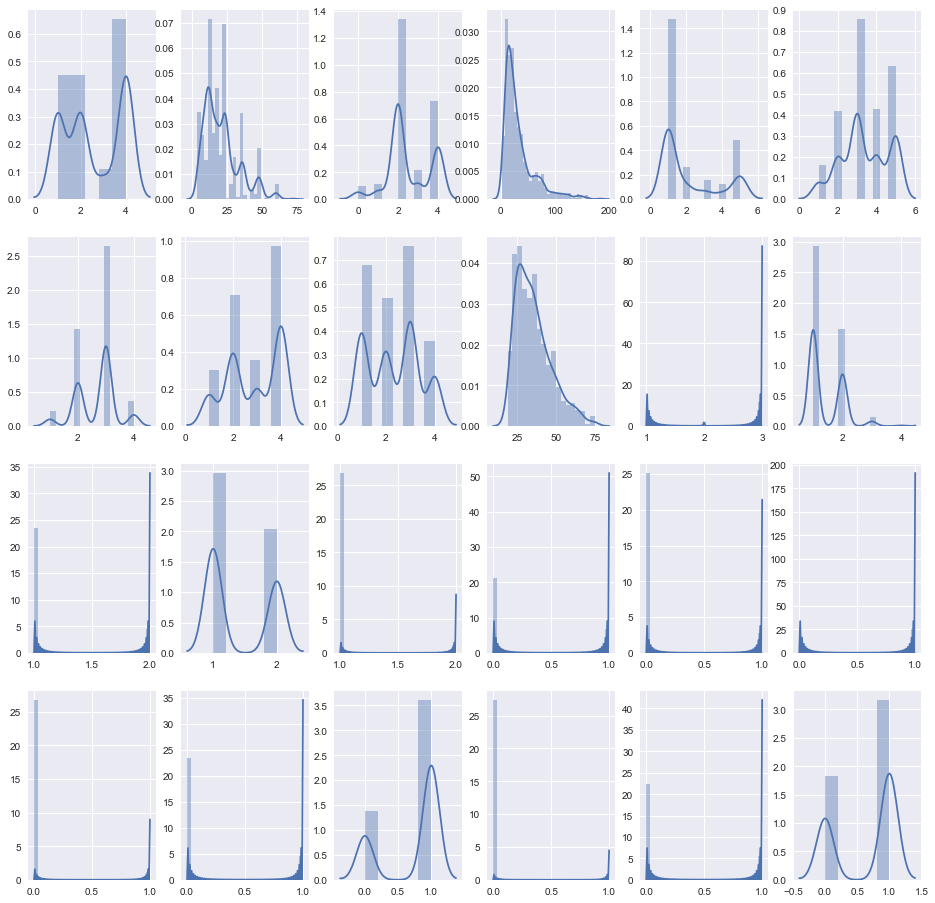

In [6]:
data_dict = split_train_test(data, NUM_SAMPLES)
NUM_TRAIN, NUM_TEST = data_dict['train'][0], data_dict['test'][0]
X_train, X_test = data_dict['train'][1], data_dict['test'][1]
y_train, y_test = data_dict['train'][2], data_dict['test'][2]

mp_plt.figure(figsize=(16,16))
for i in range(24):
  mp_plt.subplot(4,6,i+1)
  sns.distplot(X_train[:,i])

In [7]:
def get_accuracy(y_test, y_pred):
  return np.float64(sum(y_test == y_pred)) / np.float64(y_test.size)

def linear_classifier(data, NUM_SAMPLES, NUM_ITER):
  # initialise
  acc = np.empty((NUM_ITER, 1))
  
  for i in range(NUM_ITER):
    # random subsampling
    l1_idx = np.asarray([i for i in range(NUM_SAMPLES) if data[i,-1] == 1])
    l2_idx = np.asarray([i for i in range(NUM_SAMPLES) if data[i,-1] == 2])
    l1_idx = np.random.choice(l1_idx, l2_idx.size, replace=False)
    data_subsampled = np.concatenate((data[l1_idx], data[l2_idx]), axis=0)
    np.random.shuffle(data_subsampled)
    
    # generate training and test data
    data_dict = split_train_test(data_subsampled, data_subsampled.shape[0])
    NUM_TRAIN, NUM_TEST = data_dict['train'][0], data_dict['test'][0]
    X_train, X_test = data_dict['train'][1], data_dict['test'][1]
    y_train, y_test = data_dict['train'][2], data_dict['test'][2]
    
    # data correlation
#    get_corr(X_train)

    # normalise data
    standardscaler = sklearn_pproc.StandardScaler()
    X_train = standardscaler.fit_transform(X_train.astype('float64'))
    X_test = standardscaler.transform(X_test.astype('float64'))
    
    # dimensionality reduction
    pca = sklearn_dcmp.PCA(n_components=11, whiten=True)
    X_train = pca.fit_transform(X_train)
    X_test = pca.transform(X_test)
    
    # randomly sample data from both classes
#     clf = sklearn_lm.SGDClassifier(loss='log', penalty='none')
    clf = sklearn_lm.LogisticRegression(penalty='l2')
    clf.fit(X_train, y_train)

    y_pred = clf.predict(X_test)
    acc[i] = get_accuracy(y_test, y_pred)

  return acc

acc = linear_classifier(data, NUM_SAMPLES, 50)
print(np.mean(acc), np.var(acc))

0.716833333333 0.00169858333333
